<a href="https://colab.research.google.com/github/MohamedHashimYoussef/Brain-Tumor-Diagnosis/blob/master/TumorCancerPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

> A tumor is an abnormal lump or growth of cells. When the cells in the tumor are normal, it is benign. Something just went wrong, and they overgrew and produced a lump. When the cells are abnormal and can grow uncontrollably, they are cancerous cells, and the tumor is malignant.





> The early diagnosis of Tumor can improve the prognosis and chance of survival significantly, as it can promote timely clinical treatment to patients. Further accurate classification of benign tumors can prevent patients undergoing unnecessary treatments.


# **Goal**

>  Predict the Patient diagnosis based on the given features.



# **Data**


* **Train and validation data :**


> Contains 455 row each row consist of 30 independent features(F1 -> F30) and 1 dependent   feature(diagnosis)


  
* **Test data :**

> Contains 114 row each row consist of 30 independent features(F1 -> F30)






In [0]:
# Import Helpful Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import os
print(os.listdir("/content/drive/My Drive/Tumor/"))


['Tumor Cancer Prediction_test.csv', 'Tumor Cancer Prediction_train.csv', 'Tumor Cancer Prediction_sample.csv']


# **Read Data**

In [0]:
# We are rading our data
data = pd.read_csv('/content/drive/My Drive/Tumor/Tumor Cancer Prediction_train.csv')

In [0]:
# Print First Five rows in Data
data.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,diagnosis
0,1,0.008043,10.05,17.53,64.41,0.02100,0.10070,0.1402,0.07326,0.02511,0.01690,0.01775,0.01449,0.07664,0.1890,0.06331,384.0,0.2619,0.2894,0.14020,2.0150,1.778,16.85,0.007803,0.1055,0.002778,11.16,26.84,71.98,310.8,0.06499,B
1,2,0.010450,10.80,21.98,68.79,0.01844,0.08801,0.1303,0.05743,0.03614,0.02991,0.01404,0.02148,0.07662,0.2016,0.05977,489.5,0.3077,0.2965,0.16960,1.6210,2.240,20.20,0.006543,0.1927,0.002690,12.76,32.04,83.69,359.9,0.07485,B
2,3,0.008747,16.14,14.86,104.30,0.01500,0.09495,0.1206,0.08501,0.05500,0.01831,0.04528,0.01246,0.07012,0.1735,0.05875,947.9,0.2387,0.2778,0.17220,0.6372,1.729,21.83,0.003958,0.2310,0.001621,17.71,19.58,115.90,800.0,0.11290,B
3,4,0.015190,12.18,17.84,77.79,0.02220,0.10450,0.1140,0.07057,0.02490,0.01131,0.02941,0.01179,0.07376,0.1900,0.06635,495.2,0.3661,0.2227,0.09358,1.5110,2.410,24.44,0.005433,0.0498,0.003408,12.83,20.92,82.14,451.1,0.05882,B
4,5,0.004551,12.25,22.44,78.18,0.01608,0.08192,0.1256,0.05200,0.01714,0.00941,0.01261,0.01205,0.08203,0.1544,0.05976,622.9,0.2239,0.3100,0.18040,1.1390,1.577,18.04,0.005096,0.1230,0.002399,14.17,31.99,92.74,466.5,0.06335,B


In [0]:
# Delete index Colum
del data['Index']

# **Data Exploration**

In [0]:
# Print Data Shape
data.shape

(455, 31)

In [0]:
data.diagnosis.value_counts()

B    290
M    165
Name: diagnosis, dtype: int64

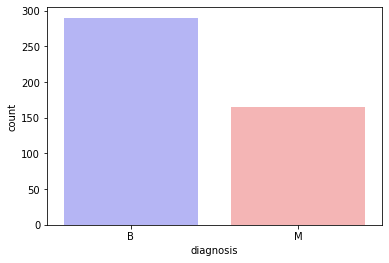

In [0]:
sns.countplot(x="diagnosis", data=data, palette="bwr")
plt.show()

In [0]:
countNoDisease = len(data[data.diagnosis == 'B'])
countHaveDisease = len(data[data.diagnosis == 'M'])
print("Percentage of Patients Haven Benign Tumor : {:.2f}%".format((countNoDisease / (len(data.diagnosis))*100)))
print("Percentage of Patients Have Malignant Tumor : {:.2f}%".format((countHaveDisease / (len(data.diagnosis))*100)))

Percentage of Patients Haven Benign Tumor : 63.74%
Percentage of Patients Have Malignant Tumor : 36.26%


In [0]:
# Get Mean of All Features For Each Label
data.groupby('diagnosis').mean()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,0.009948,12.183059,17.870310,78.326345,0.020614,0.092664,0.125292,0.080026,0.046976,0.026707,0.026129,0.021432,0.079229,0.174108,0.062798,561.211379,0.281934,0.270595,0.182805,1.217080,1.978918,21.027228,0.007200,0.168842,0.003589,13.418152,23.460793,87.232345,465.041379,0.075397
M,0.014631,17.503636,21.407091,115.531394,0.020369,0.103003,0.145056,0.144258,0.158680,0.039850,0.088342,0.031445,0.090983,0.192945,0.062440,1443.576364,0.614468,0.325253,0.373234,1.197227,4.312733,74.133697,0.006658,0.440875,0.003924,21.244000,29.190909,141.829758,985.610303,0.183083


In [0]:
# Summary & Describe Data
data.describe()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,228.000000,0.011646,14.112499,19.152879,91.818286,0.020525,0.096413,0.132459,0.103319,0.087485,0.031473,0.048690,0.025063,0.083491,0.180939,0.062668,881.189890,0.402524,0.290416,0.251862,1.209881,2.825247,40.285618,0.007003,0.267491,0.003710,16.256097,25.538747,107.031407,653.819121,0.114448
std,131.491445,0.005897,3.535375,4.158963,24.313012,0.008196,0.013799,0.022626,0.050490,0.077802,0.031106,0.038597,0.017510,0.017814,0.027398,0.006819,586.395654,0.284371,0.062992,0.153109,0.541961,2.037754,47.730421,0.002844,0.199638,0.002610,4.890553,6.100631,33.869187,358.166179,0.065321
min,1.000000,0.000000,6.981000,9.710000,43.790000,0.007882,0.052630,0.071170,0.019380,0.000000,0.000000,0.000000,0.002252,0.055040,0.106000,0.049960,185.200000,0.111500,0.156500,0.027290,0.360200,0.757000,7.228000,0.001713,0.000000,0.000895,7.930000,12.020000,50.410000,143.500000,0.000000
25%,114.500000,0.007691,11.685000,16.070000,75.100000,0.015015,0.086650,0.116400,0.066160,0.029950,0.015215,0.020720,0.013050,0.071365,0.161850,0.057885,514.650000,0.232050,0.249400,0.147750,0.832400,1.594000,17.740000,0.005163,0.116550,0.002208,13.020000,21.005000,84.135000,418.500000,0.064955
50%,228.000000,0.010780,13.280000,18.750000,85.980000,0.018720,0.095940,0.131600,0.092280,0.060150,0.025440,0.033410,0.020250,0.079610,0.179200,0.061540,675.200000,0.314700,0.281500,0.211800,1.127000,2.222000,23.560000,0.006369,0.228200,0.003071,14.850000,25.210000,97.110000,541.800000,0.098610
75%,341.500000,0.014595,15.720000,21.590000,103.650000,0.022935,0.105400,0.145250,0.129300,0.124600,0.040000,0.074095,0.031720,0.091620,0.195500,0.065795,1032.500000,0.470300,0.319000,0.335000,1.472000,3.270500,44.410000,0.008156,0.378150,0.004457,18.410000,29.335000,124.200000,761.500000,0.160800
max,455.000000,0.052790,28.110000,33.810000,188.500000,0.061460,0.144700,0.222600,0.311400,0.426800,0.396000,0.201200,0.135400,0.207500,0.304000,0.097440,4254.000000,2.873000,0.663800,1.058000,4.885000,21.980000,542.200000,0.023330,1.252000,0.029840,36.040000,49.540000,251.200000,2501.000000,0.290300


# **Preprocessing**

In [0]:
# Divide Data to Features and Label

X           = data.iloc[:,:-1].values
Y           = data.iloc[:,-1].values

# Convert Labels From String to number
y_train   = []
for i in range(0 ,len(Y)):
    if Y[i] == 'B':
        y_train.append(0)
    else :
        y_train.append(1)
y_train = np.array(y_train)

In [0]:
# Scale Data using Standard Scaler 
sc          = StandardScaler()
X_train           = sc.fit_transform(X)
print(X_train)

[[-0.61170002 -1.15036482 -0.39064196 ... -1.0360446  -0.95876358
  -0.75798367]
 [-0.20309076 -0.93798972  0.68051405 ... -0.68992205 -0.82152548
  -0.60687023]
 [-0.49218988  0.574121   -1.03333557 ...  0.26213665  0.40858627
  -0.02371948]
 ...
 [-0.86260343 -1.32422924 -0.20048168 ... -0.92342915 -1.04876494
  -0.97974953]
 [-1.97706948 -1.24380987 -0.2245526  ... -1.32364258 -1.02221174
  -1.75401433]
 [ 0.17377362 -0.73694129  1.14989702 ... -0.73159863 -0.69966029
  -0.27460457]]


# **Neural Network**







## 1. **Sigmoid**




In [0]:
np.random.seed(1000)
# Use ANN
classifier      = Sequential()
classifier.add(Dense(7 , init='uniform' , activation= 'relu' , input_shape=(30,)))
classifier.add(Dense(7 , init='uniform' , activation = 'relu' ))
classifier.add(Dense(1 , init='uniform' , activation='sigmoid' ))
classifier.compile(optimizer='adam' , loss='binary_crossentropy', metrics=['accuracy'])
# Fitting ANN to Training set
classifier.fit(X_train , y_train , batch_size=10 , nb_epoch=50, validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, activation="relu", input_shape=(30,), kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, activation="relu", kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 364 samples, validate on 91 samples
Epoch 1/50
364/364 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.6429 - val_loss: 0.6818 - val_accuracy: 0.6374
Epoch 2/50
364/364 [==============================] - 0s 143us/step - loss: 0.6528 - accuracy: 0.7692 - val_loss: 0.6146 - val_accuracy: 0.9231
Epoch 3/50
364/364 [==============================] - 0s 145us/step - loss: 0.5285 - accuracy: 0.9423 - val_loss: 0.4531 - val_accuracy: 0.9560
Epoch 4/50
364/364 [==============================] - 0s 160us/step - loss: 0.3541 - accuracy: 0.9396 - val_loss: 0.2931 - val_accuracy: 0.9780
Epoch 5/50
364/364 [==============================] - 0s 152us/step - loss: 0.2355 - accuracy: 0.9451 - val_loss: 0.1962 - val_accuracy: 0.9890
Epoch 6/50
364/364 [==============================] - 0s 146us/step - loss: 0.1721 - accuracy: 0.9615 - val_loss: 0.1471 - val_accuracy: 0.9890
Epoch 7/50
364/364 [==============================] - 0s 153us/step - loss: 0.1404 - accuracy

In [0]:
# Reading Test Data
test_data   = pd.read_csv('/content/drive/My Drive/Tumor/Tumor Cancer Prediction_test.csv')
del test_data['Index']
test   = test_data.iloc[:,:].values

In [0]:
# Scale Test Data 
test    = sc.transform(test)
print(test)

[[ 0.28751196 -0.20175604  0.3290786  ...  0.18528621 -0.27145506
   1.3893291 ]
 [-0.88195592 -0.25555773  1.46763319 ... -0.4652823  -0.32400244
  -0.83369364]
 [-0.15046556 -0.02619262 -0.8407682  ... -0.31039911 -0.13226041
  -0.49483785]
 ...
 [ 1.26532225  1.71811488  0.09318356 ...  1.15182826  1.66636924
   1.57630515]
 [-0.20139318  1.18859296  0.34352115 ...  1.03950839  1.11294474
   0.56019755]
 [-0.27269184  0.26263752 -0.58080224 ...  0.07887791  0.09945116
  -0.19383705]]


In [0]:
# Prediction 
y_pred  = classifier.predict(test)
final   = []
for i in y_pred :
  if i >= 0.5:
    final.append('M')
  else:
    final.append('B')


In [0]:
# Write answer file in CSV
f = {'Index': [i for i in range(456, 570)], "diagnosis": final}
df = pd.DataFrame(f)
df.to_csv('ans.csv', index=False)

>***Achieved accuracy 98.245%***

## 2. **Softmax**

In [0]:
# Preprocess Step to Convert Labels to Probability Classes
y_train   = []
for i in range(0 ,len(Y)):
    if Y[i] == 'B':
        y_train.append( np.array([1,0]))
    else :
        y_train.append( np.array([0,1]))
y_train = np.array(y_train)

In [0]:
np.random.seed(1000)
# Define Our Model
classifier      = Sequential()
classifier.add(Dense(15 , init='uniform' , activation= 'sigmoid' , input_shape=(30,)))
classifier.add(Dense(10 , init='uniform' , activation = 'sigmoid' ))
classifier.add(Dense(10 , init='uniform' , activation = 'sigmoid' ))
classifier.add(Dense(2 , init='uniform' , activation='softmax' ))
classifier.compile(optimizer='adam' , loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, activation="sigmoid", input_shape=(30,), kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="sigmoid", kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="sigmoid", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="softmax", kernel_initializer="uniform")`
  import sys


In [0]:
# Fitting Model
classifier.fit(X_train , y_train , batch_size=10 , nb_epoch=20, validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 364 samples, validate on 91 samples
Epoch 1/20
364/364 [==============================] - 0s 657us/step - loss: 0.6749 - accuracy: 0.6456 - val_loss: 0.6736 - val_accuracy: 0.6044
Epoch 2/20
364/364 [==============================] - 0s 210us/step - loss: 0.6547 - accuracy: 0.6456 - val_loss: 0.6710 - val_accuracy: 0.6044
Epoch 3/20
364/364 [==============================] - 0s 168us/step - loss: 0.6498 - accuracy: 0.6456 - val_loss: 0.6719 - val_accuracy: 0.6044
Epoch 4/20
364/364 [==============================] - 0s 155us/step - loss: 0.6461 - accuracy: 0.6456 - val_loss: 0.6676 - val_accuracy: 0.6044
Epoch 5/20
364/364 [==============================] - 0s 159us/step - loss: 0.6395 - accuracy: 0.6456 - val_loss: 0.6612 - val_accuracy: 0.6044
Epoch 6/20
364/364 [==============================] - 0s 166us/step - loss: 0.6322 - accuracy: 0.6456 - val_loss: 0.6542 - val_accuracy: 0.6044
Epoch 7/20
364/364 [==============================] - 0s 153us/step - loss: 0.6252 - accura

In [0]:
# Make Prediction
y_pred  = classifier.predict(test)
print(y_pred)

[[0.5101374  0.4898626 ]
 [0.51013726 0.4898627 ]
 [0.5101369  0.489863  ]
 [0.5101373  0.48986265]
 [0.51013684 0.48986307]
 [0.51013714 0.48986286]
 [0.5101367  0.4898633 ]
 [0.5101374  0.4898626 ]
 [0.5101377  0.48986232]
 [0.51013637 0.4898637 ]
 [0.51013625 0.48986378]
 [0.5101371  0.48986295]
 [0.51013714 0.48986286]
 [0.51013684 0.48986307]
 [0.51013637 0.4898637 ]
 [0.51013654 0.48986349]
 [0.5101362  0.48986378]
 [0.5101372  0.48986277]
 [0.5101362  0.4898638 ]
 [0.51013666 0.48986334]
 [0.5101376  0.4898624 ]
 [0.51013654 0.48986349]
 [0.5101371  0.489863  ]
 [0.51013714 0.48986292]
 [0.5101362  0.48986378]
 [0.51013684 0.4898631 ]
 [0.51013726 0.48986274]
 [0.5101366  0.48986334]
 [0.51013714 0.48986286]
 [0.5101373  0.48986265]
 [0.51013684 0.48986316]
 [0.5101372  0.48986277]
 [0.51013696 0.48986298]
 [0.510137   0.48986298]
 [0.5101371  0.48986298]
 [0.5101373  0.48986265]
 [0.5101372  0.48986286]
 [0.5101369  0.48986307]
 [0.5101369  0.48986307]
 [0.51013726 0.4898628 ]


In [0]:
# Take Maximum Probability Index Class
pp = np.argmax(y_pred, axis=1)
final = []
for i in pp:
    if i == 0:
        final.append('B')
    else:
        final.append('M')

In [0]:
# Write answer in CSV File
f = {'Index': [i for i in range(456, 570)], "diagnosis": final}
df = pd.DataFrame(f)
df.to_csv('ans.csv', index=False)

>***Achieved accuracy 0.94736%***

# **Machine Learning**

## 1. **KNearestNeighboors**

In [0]:
# import data splitting
from sklearn.model_selection import train_test_split
x_train , x_test , y_t , y_test = train_test_split(X_train , y_train , test_size=0.2 , random_state=0 )

In [0]:
# Fitting Model with k = 3
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train , y_t)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
# Prediction
y_pred = clf.predict(x_test)

In [0]:
# Calculate  Validation accuracy
from sklearn.metrics import accuracy_score
print('Validation Accuracy : {}'.format(accuracy_score(y_test, y_pred) * 100))

Validation Accuracy : 97.8021978021978


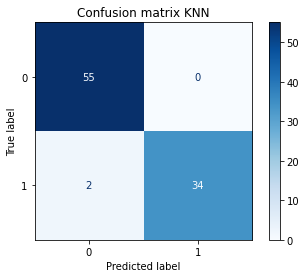

In [0]:
# Confusion Matrix
labels = np.unique(y_test)
disp = plot_confusion_matrix(clf, x_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix KNN')
plt.show()

## 2. **Logistic Regression**

In [0]:
# Import Logistic Regression 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train , y_t)

In [0]:
# Predict
y_pred = clf.predict(x_test)

In [0]:
# Calculate  Validation accuracy
from sklearn.metrics import accuracy_score
print('Validation Accuracy : {}'.format(accuracy_score(y_test, y_pred) * 100))

Validation Accuracy : 95.6043956043956


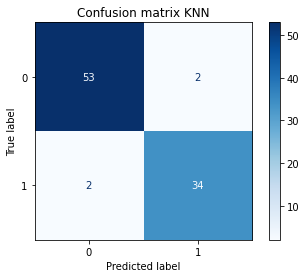

In [0]:
# Confusion Matrix
labels = np.unique(y_test)
disp = plot_confusion_matrix(clf, x_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix KNN')
plt.show()

## 3. **Decision Tree**

In [0]:
# Import Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train , y_t)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
#Prediction
y_pred = clf.predict(x_test)

In [0]:
# Calculate  Validation accuracy
from sklearn.metrics import accuracy_score
print('Validation Accuracy : {}'.format(accuracy_score(y_test, y_pred) * 100))

Validation Accuracy : 92.3076923076923


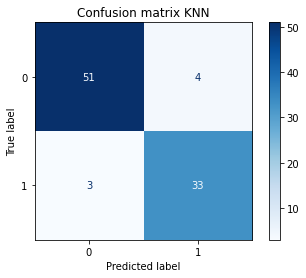

In [0]:
# Confusion Matrix
labels = np.unique(y_test)
disp = plot_confusion_matrix(clf, x_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix KNN')
plt.show()

# **PCA**

In [0]:
# Import PCA Script
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

print(pca.explained_variance_ratio_)

[4.34307675e-01 1.97401146e-01 9.35177070e-02 6.67766058e-02
 5.64245165e-02 4.07161938e-02 2.14925398e-02 1.51269268e-02
 1.39676264e-02 1.16009156e-02 1.01216224e-02 8.97175303e-03
 7.71439121e-03 5.55309643e-03 3.11522438e-03 2.64580181e-03
 1.99647487e-03 1.70618303e-03 1.50414589e-03 1.06143766e-03
 9.94608221e-04 8.78454935e-04 7.24281209e-04 5.81085817e-04
 5.46645369e-04 2.61499457e-04 2.16152203e-04 4.62504070e-05
 2.53207432e-05 3.71910834e-06]


['F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7' 'F8' 'F9' 'F10' 'F11' 'F12' 'F13'
 'F14' 'F15' 'F16' 'F17' 'F18' 'F19' 'F20' 'F21' 'F22' 'F23' 'F24' 'F25'
 'F26' 'F27' 'F28' 'F29' 'F30']


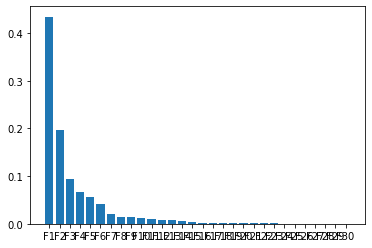

In [0]:
# Plotting 
df = pd.read_csv('/content/drive/My Drive/Tumor/Tumor Cancer Prediction_train.csv')
del df['Index']
del df['diagnosis']
xplt = np.array(df.columns)
print(xplt)
plt.bar(xplt,pca.explained_variance_ratio_)
plt.show()